<a href="https://colab.research.google.com/github/dmswn1004/Python_Data-visualization/blob/main/22_%EB%84%A4%ED%8A%B8%EC%9B%8C%ED%81%AC_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
g = nx.Graph()

In [4]:
type(g)

networkx.classes.graph.Graph

In [7]:
g.add_nodes_from([1,2,3,4,5]) # 리스트로 노드 추가

In [8]:
g.add_node(6) # 하나씩 노드 추가

In [9]:
g.add_edges_from([(1,3),(2,4),(2,5),(2,6),(3,4,),(4,6)]) # 리스트로 링크 추가

In [6]:
g.add_edge(5,6) # 하나씩 링크 추가

In [10]:
g.nodes()

NodeView((1, 3, 2, 4, 5, 6))

In [11]:
g.edges()

EdgeView([(1, 3), (3, 4), (2, 4), (2, 5), (2, 6), (4, 6), (5, 6)])

In [12]:
g.number_of_nodes()

6

In [13]:
g.number_of_edges()

7

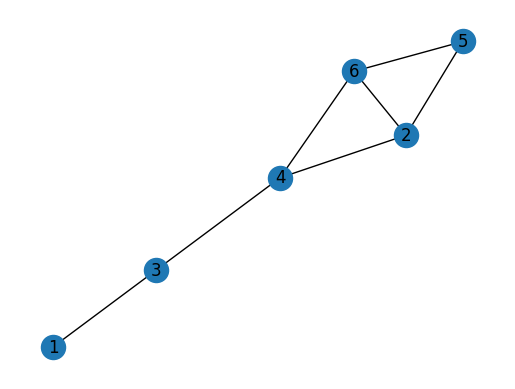

In [14]:
nx.draw_networkx(g)
plt.axis('off')
plt.show()

In [15]:
g.nodes[1]['gender'] = 'male'
g.nodes[2]['gender'] = 'female'
g.nodes[3]['gender'] = 'male'
g.nodes[4]['gender'] = 'female'
g.nodes[5]['gender'] = 'male'
g.nodes[6]['gender'] = 'male'

nx.get_node_attributes(g, 'gender')

{1: 'male', 3: 'male', 2: 'female', 4: 'female', 5: 'male', 6: 'male'}

In [19]:
g[1][3]['weigth'] = 3
g[2][4]['weigth'] = 1
g[2][5]['weigth'] = 4
g[2][6]['weigth'] = 3
g[3][4]['weigth'] = 2
g[4][6]['weigth'] = 3
g.edges[5,6]['weight'] = 4

nx.get_edge_attributes(g, 'weigth')

{(1, 3): 3, (3, 4): 2, (2, 4): 1, (2, 5): 4, (2, 6): 3, (4, 6): 3}

In [20]:
g.nodes(data=True)

NodeDataView({1: {'gender': 'male'}, 3: {'gender': 'male'}, 2: {'gender': 'female'}, 4: {'gender': 'female'}, 5: {'gender': 'male'}, 6: {'gender': 'male'}})

In [21]:
g.edges(data=True)

EdgeDataView([(1, 3, {'weigth': 3}), (3, 4, {'weigth': 2}), (2, 4, {'weigth': 1}), (2, 5, {'weigth': 4}), (2, 6, {'weigth': 3}), (4, 6, {'weigth': 3}), (5, 6, {'weight': 4})])

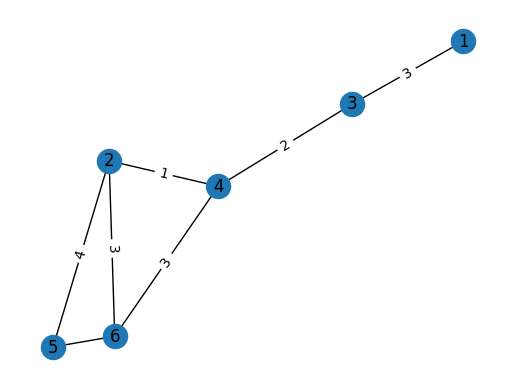

In [23]:
pos = nx.spring_layout(g) # 각 노드의 positon
nx.draw_networkx(g, pos)

labels = nx.get_edge_attributes(g, 'weigth')
nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)

plt.axis('off')
plt.show()

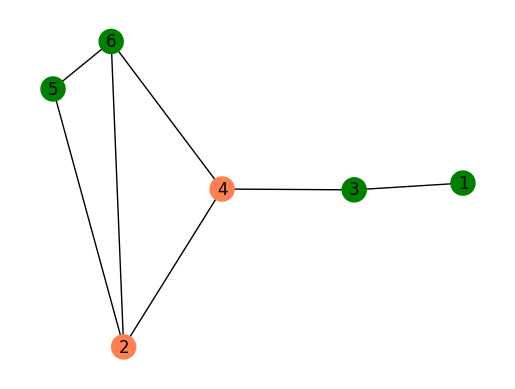

In [24]:
color_map = []
for n, d in g.nodes(data=True):
  if d['gender'] == 'female':
    color_map.append('coral')
  else:
    color_map.append('green')

pos = nx.spring_layout(g)
nx.draw_networkx(g, pos, node_color=color_map)

labels = nx.get_edge_attributes(g, 'weigth')
plt.axis('off')
plt.show()

In [28]:
[n for n, d in g.nodes(data=True) if d['gender'] == 'female']

[2, 4]

In [33]:
g2 = nx.DiGraph()
g2.add_edges_from([(1,2),(2,4),(4,2),(3,3),(1,3),(5,1)])

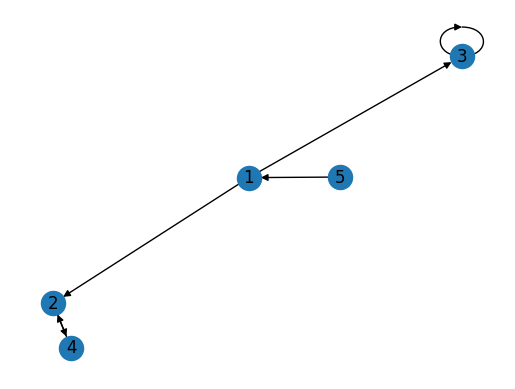

In [34]:
nx.draw_networkx(g2)
plt.axis('off')
plt.show()

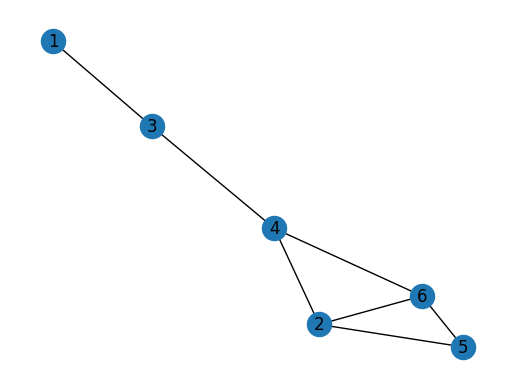

In [35]:
nx.draw_networkx(g)
plt.axis('off')
plt.show()

In [36]:
list(g.neighbors(4))

[2, 3, 6]

In [37]:
g.degree(4)

3

In [39]:
nx.shortest_path(g,3,5)

[3, 4, 2, 5]

In [40]:
nx.shortest_path(g)

{1: {1: [1],
  3: [1, 3],
  4: [1, 3, 4],
  2: [1, 3, 4, 2],
  6: [1, 3, 4, 6],
  5: [1, 3, 4, 2, 5]},
 3: {3: [3],
  1: [3, 1],
  4: [3, 4],
  2: [3, 4, 2],
  6: [3, 4, 6],
  5: [3, 4, 2, 5]},
 2: {2: [2], 4: [2, 4], 5: [2, 5], 6: [2, 6], 3: [2, 4, 3], 1: [2, 4, 3, 1]},
 4: {4: [4], 2: [4, 2], 3: [4, 3], 6: [4, 6], 5: [4, 2, 5], 1: [4, 3, 1]},
 5: {5: [5],
  2: [5, 2],
  6: [5, 6],
  4: [5, 2, 4],
  3: [5, 2, 4, 3],
  1: [5, 2, 4, 3, 1]},
 6: {6: [6], 2: [6, 2], 4: [6, 4], 5: [6, 5], 3: [6, 4, 3], 1: [6, 4, 3, 1]}}

In [41]:
nx.shortest_path(g,  weight='weight')

{1: {1: [1],
  3: [1, 3],
  4: [1, 3, 4],
  2: [1, 3, 4, 2],
  6: [1, 3, 4, 6],
  5: [1, 3, 4, 2, 5]},
 3: {3: [3],
  1: [3, 1],
  4: [3, 4],
  2: [3, 4, 2],
  6: [3, 4, 6],
  5: [3, 4, 2, 5]},
 2: {2: [2], 4: [2, 4], 5: [2, 5], 6: [2, 6], 3: [2, 4, 3], 1: [2, 4, 3, 1]},
 4: {4: [4], 2: [4, 2], 3: [4, 3], 6: [4, 6], 5: [4, 2, 5], 1: [4, 3, 1]},
 5: {5: [5],
  2: [5, 2],
  6: [5, 2, 6],
  4: [5, 2, 4],
  3: [5, 2, 4, 3],
  1: [5, 2, 4, 3, 1]},
 6: {6: [6],
  2: [6, 2],
  4: [6, 4],
  5: [6, 2, 5],
  3: [6, 4, 3],
  1: [6, 4, 3, 1]}}

In [42]:
nx.degree_centrality(g)

{1: 0.2,
 3: 0.4,
 2: 0.6000000000000001,
 4: 0.6000000000000001,
 5: 0.4,
 6: 0.6000000000000001}

In [43]:
nx.betweenness_centrality(g)

{1: 0.0,
 3: 0.4,
 2: 0.15000000000000002,
 4: 0.6000000000000001,
 5: 0.0,
 6: 0.15000000000000002}

In [44]:
nx.betweenness_centrality(g, weight='weight')

{1: 0.0, 3: 0.4, 2: 0.4, 4: 0.6000000000000001, 5: 0.0, 6: 0.0}

In [45]:
nx.closeness_centrality(g)

{1: 0.38461538461538464,
 3: 0.5555555555555556,
 2: 0.625,
 4: 0.7142857142857143,
 5: 0.45454545454545453,
 6: 0.625}

In [46]:
nx.eigenvector_centrality(g)

{1: 0.07902199743319213,
 3: 0.20983546432528058,
 2: 0.5299719499101774,
 4: 0.47818048045123035,
 5: 0.39915848301808887,
 6: 0.5299719499101774}

In [47]:
nx.eigenvector_centrality(g, weight='weight')

{1: 0.01065226562288839,
 3: 0.049769362204895265,
 2: 0.32524597796653965,
 4: 0.22188147376475678,
 5: 0.636078734514325,
 6: 0.6616623374033324}